# Johan Knarreborg - Exploratory Data Analysis 

## The data  

We have a large data set with over 18MB of data. In the following exploratory data analysis we will look into this data. This will give us an understanding of what can be done and what cannot be done with the data.

The goal is to make an analysis looking into who the best driver in all of formula ones history has been. However, to see if this is possible, we will have to take a look at the data. 

In [1]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
from analysis1_pipeline import pipeline
import numpy as np
import seaborn as sns

In [2]:
#running my pipeline function
pipeline("../data/raw/","../data/processed/Johan_Processed/")

In [3]:
#Importing the raw data and substituing the '\N' values for NaN. 
circuits = pd.read_csv("../data/processed/Johan_Processed/circuits.csv")
drivers = pd.read_csv("../data/processed/Johan_Processed/drivers.csv")
results = pd.read_csv("../data/processed/Johan_Processed/results.csv")
seasons = pd.read_csv("../data/processed/Johan_Processed/seasons.csv")
status = pd.read_csv("../data/processed/Johan_Processed/status.csv")
lap_times = pd.read_csv("../data/processed/Johan_Processed/lap_times.csv")
pit_stops = pd.read_csv("../data/processed/Johan_Processed/pit_stops.csv")
qualifying = pd.read_csv("../data/processed/Johan_Processed/qualifying.csv")
races = pd.read_csv("../data/processed/Johan_Processed/races.csv")
constructors = pd.read_csv("../data/processed/Johan_Processed/constructors.csv")
constructor_results = pd.read_csv("../data/processed/Johan_Processed/constructor_results.csv")
constructor_standings = pd.read_csv("../data/processed/Johan_Processed/constructor_standings.csv")
driver_standings = pd.read_csv("../data/processed/Johan_Processed/driver_standings.csv")

In [4]:
#setting the seaborn theme 
sns.set_theme(style="whitegrid",palette="Blues_d")

In [19]:
#cleaning the data
#Since we are going to use the results df and the races df together we are going to merge them together using their raceId. We will also remove those columns that we know we will not need. 
results_races = pd.merge(results,races,on="raceId",how="left")
results_races = results_races.drop(["url","time_y","rank","date","name","round","Unnamed: 0_y","Unnamed: 0_x"],axis=1)

# Explanatory Data Analysis

To get some inseights into the data we will look at the following parts of the data: 

    - How much of the data is missing in the main dataset
    
    - Types of in the dataset  

    - The average finish time for each season 
    
    - When in races the fastests lap are set for each season
    
    - The number of different races in each season 
    
    
    
    
 ---
 
 The biggest dataframe is the merged results_races dataframe. This dataframe has a lot of interresting columns for the analysis. However, we will need to look into how of the data is actually there. 
 

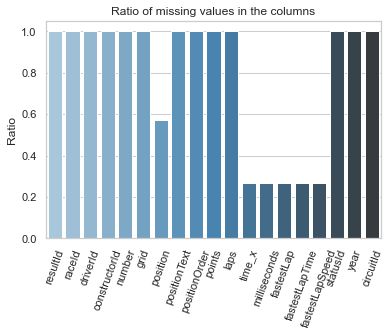

In [82]:
#Finding out much data is missing. 
x = pd.DataFrame((1-(results_races.isnull().sum())/(np.size(results_races["driverId"]))))
plt.xticks(rotation=70)
ax = sns.barplot(x=results_races.columns, y=x[0], data=x,palette="Blues_d")
plt.ylabel("Ratio")
plt.title("Ratio of missing values in the columns");

Here we see that some values are missing for almost two thirds of data in some columns. For the position results we will also have to make sure that we use the column positionTest or positionOrder, since these columns do not miss any values. 


However, other than these columns, almost all of the columns has no missing values.

---

Next we will look into what types of data is in the results_races dataframe: 


In [65]:
results_races.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time_x              object
milliseconds       float64
fastestLap         float64
fastestLapTime      object
fastestLapSpeed    float64
statusId             int64
year                 int64
circuitId            int64
dtype: object

Here we have integers or float values for all the columns but one. This will make working with the data easier. 
 
---

Apart from just looking how much data and what kind of data we have, we also want to see what general trends there is in the data. Therefore we will take a look at how the average finishing time per race has evolved over the years. 

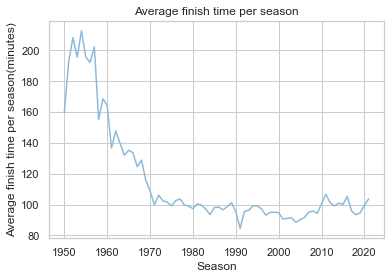

In [8]:
#Finding the average times per season
season = results_races[["year","milliseconds"]].copy()
season = season.groupby("year").mean().reset_index()
season["minutes"]= season["milliseconds"]/(1000*60)

#plotting the average times
sns.lineplot(x=season["year"],y=season["minutes"],data=season)
plt.title("Average finish time per season")
plt.xlabel("Season");
plt.ylabel("Average finish time per season(minutes)");

Here we see a clear downward going trends. We will have to make sure that this trends does not bias an analysis on the best driver in formula ones history towards more recent drivers. 

--- 

For the fastest lap there is only data from 2004 and onwards. We will see when in the race the fastest lap has been set thorugh the seasons. 

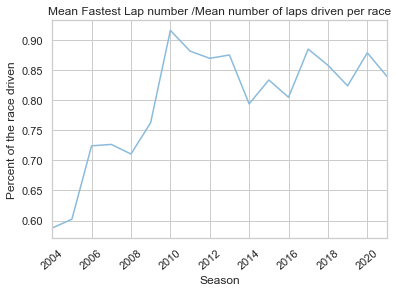

In [79]:
#For the fastest lap there is only data from 2004 and onwards 
#We find the mean fastest lap for each season devided by the mean number of laps driven each season. 

#Going through each season and finding the average lap # for all the cars that finish the race 
season = results_races.groupby("year").mean().reset_index()
season["ratioLap"] = season["fastestLap"]/season["laps"]

#plotting how far into the race the fastest lap has been set throughout the seasons
ax = sns.lineplot(x=season["year"],y=season["ratioLap"],data=season)
ax.set(xlim=(2004,2021))
plt.title("Mean Fastest Lap number /Mean number of laps driven per race")
plt.xlabel("Season")
plt.ylabel("Percent of the race driven")
plt.xticks(rotation=40)
plt.show()

From this we see that cars are generally setting the fastest lap later in the race in the more recent seasons. 

--- 

Another thing that could inflience the analysis is the amount of race that are per season. We will therefore look at how the amount of races has changed through the seasons.

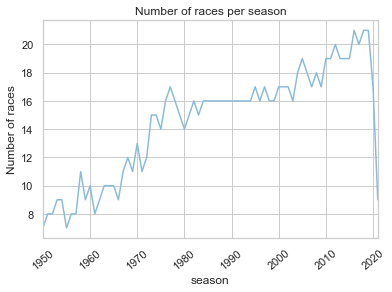

Number of diffrent races is: 1044 

The average number of races per season is: 14.5 



In [80]:
#Number of races per season 
year_season = results_races.groupby("year")
year_season = year_season.agg({"raceId": "nunique", "circuitId":"nunique"})
year_season = year_season.reset_index()

#plotting the number of races per season 
ax = sns.lineplot(x=year_season["year"],y=year_season["raceId"],data=year_season)
ax.set(xlim=(1950,2021))
plt.title("Number of races per season")
plt.xlabel("season")
plt.ylabel("Number of races")
plt.xticks(rotation=40)
plt.show()
print("Number of diffrent races is:",results_races["raceId"].unique().size,"\n")
print("The average number of races per season is:",results_races["raceId"].unique().size/results_races["year"].unique().size,"\n")

The number of races per season has dramatically increased since the 1950's. In the analysis the amount of races has to be normalized as to not penalize or favour more recent drivers. 

--- 

From the EDA it shows that the dataframes contains a lot of data and also a lot of different parameters. This should give us enough data to make a conclusion on the best driver in formula one over all. 